In [47]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import image as matimg
import tensorflow as tf

import imageio.v3 as iio
import math as m
import time
import os
import re

dimensions: 256x256x3
min_px: 0.0
max_px: 1.0
mean_px: 0.4719268162201147


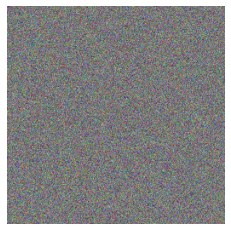

<Figure size 432x288 with 0 Axes>

In [62]:
# utility functions

# normalizes px values of ndarray to range [0, 1]
normalize = lambda img: (img - np.min(img)) / np.ptp(img)

# makes a random population of n x n x 3 pxs 
# normalized px values to range [0, 1]
populate_random = lambda n : normalize(np.random.randn(n, n, 3))

def show_img(img: np.ndarray, gray: bool=False, stats: bool=True, time: int=0.1, show: bool=True, save: bool=False, path: str | None=None) -> None:
    plt.ion()
    plt.axis('off')
    try:
        row, col, chn = img.shape
        min, max, mean = np.min(img), np.max(img), np.mean(img)
        if stats: print(f'dimensions: {row}x{col}x{chn}\nmin_px: {min}\nmax_px: {max}\nmean_px: {mean}')
        plt.imshow(img) if not gray else plt.imshow(img[:, :, 0], cmap='gray')
        if save: matimg.imsave(path, img, format='png')
        if show:
            plt.draw()
            plt.pause(time)

        plt.clf()
    except:
        print(f'unable to display img of dim: {img.shape}')


sample = populate_random(256)
show_img(sample, save=True, path='sample.png')

In [66]:
# lossless convolution on *img using kernel/filter *kernel with some lambda activation function
# note activation is a function *either lambda or defined somewhere ex np.tanh and *sigmoid

sigmoid = lambda x : 1 / (1 + np.e ** -x)
def simulate(img: np.ndarray, kernel: np.ndarray, activation, steps: int=1, show: bool=False, save: bool=False) -> np.ndarray:
    conv, step = img, 0
    dirname = './imgs'
    try:
        plt.ion()
        for _ in range(steps):
            conv = sp.ndimage.convolve(conv, kernel, mode='reflect', cval=0.0)
            activation(conv)
            conv = normalize(conv)
            show_img(conv, stats=False, save=save, show=show, path=f'{dirname}/frame_{step}.png')
            step += 1
    
    except:
        print(f'unable to convolve img with kernel\nimg dim: {img.shape}\nkernel dim: {kernel.shape}\nactivation: {activation}current step: {step}')

# void function to save the images at read_dir as a gif to write_dir
def imgs_to_gif(read_dir: str='./imgs', write_dir: str='./gifs', duration: int=0.5):
    names = sorted(os.listdir(write_dir))
    gif_num = int(re.match(r'.*_(\d)\.gif',f'{names[-1]}').group(1)) + 1 if names else 0
    gif_name = f'{write_dir}/gif_{gif_num}.gif'

    gif = [iio.imread(f'{read_dir}/{img_name}') for img_name in sorted(os.listdir(read_dir))]

    iio.imwrite(gif_name, gif, duration=duration)
            


# use this template to make ur own kernel
kernel = np.array(
    [
        [
            [1, 1, 1], [0, 0, 0], [0, 0, 0]
        ],
        [
            [1, 1, 1], [1, 1, 1], [0, 0, 0]
        ],
        [
            [1, 1, 1], [1, 1, 1], [1, 1, 1]
        ]
    ]
)


# kernel = np.random.rand(3, 3, 3)
# kernel = normalize(np.random.randn(3, 3, 3))

img = populate_random(256)

simulate(img, kernel, activation=sigmoid, steps=100, save=True)
imgs_to_gif()

# img = matimg.imread('./imgs/frame_0.png', format='png')[:, :, :]
# print(img.shape, type(img))
# plt.imshow(img)

<Figure size 432x288 with 0 Axes>